# Understanding Problem Statement

Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

**Objective**
Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.

**Data Dictionary**
You are provided with 3 files - train.csv, test.csv and sample_submission.csv

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import missingno
import pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries here.

In [2]:
df_train = pd.read_csv("train.csv")
df_train # checking the first 5 and last 5 rows of our training dataset

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


### Training set

train.csv contains the customer demographics and past activity with the bank. And also the target label representing whether the customer will churn or not.

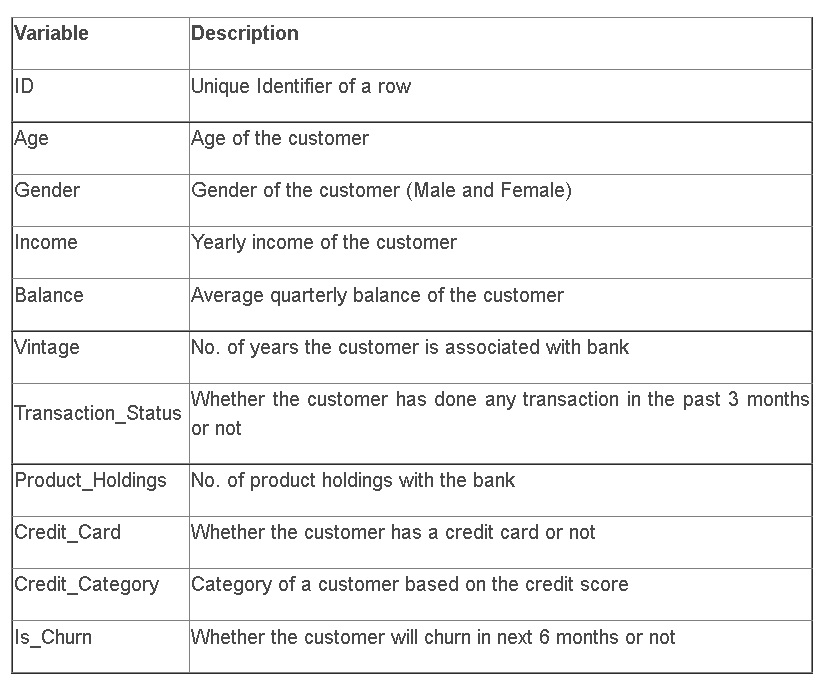

In [3]:
df_test = pd.read_csv("test.csv")
df_test # checking the first 5 and last 5 rows of our testing dataset

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good
...,...,...,...,...,...,...,...,...,...,...
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor


### Testing set

test.csv contains the customer demographics and past activity with the bank. And you need to predict whether the customer will churn or not.

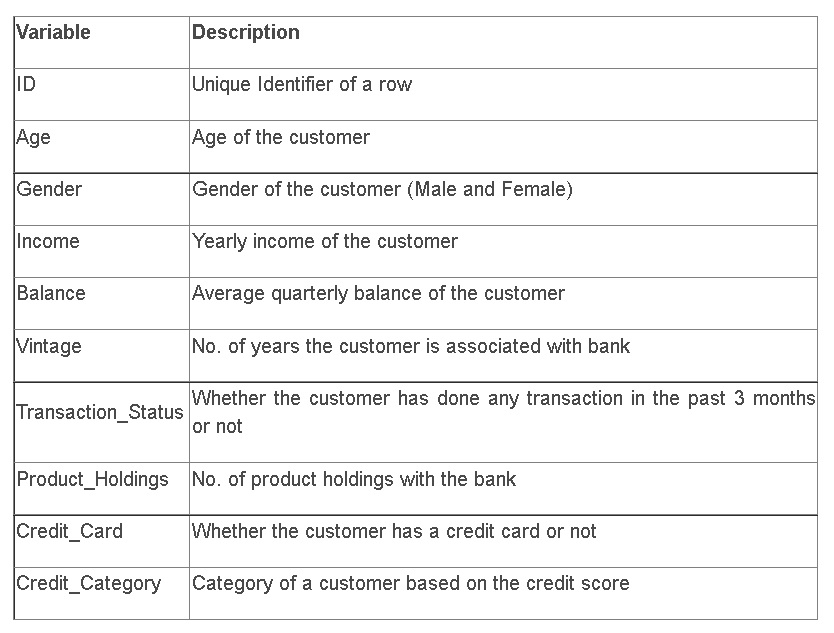

In [4]:
sample = pd.read_csv("sample_submission.csv")
sample # checking the submission format here

,ID,Is_Churn
0,55480787,1
1,9aededf2,1
2,a5034a09,1
3,b3256702,1
4,dc28adb5,1
...,...,...
2846,19e40adf,1
2847,52d5bc8d,1
2848,f708121b,1
2849,f008715d,1


### Submission File Format

sample_submission.csv contains only 2 variables - row_id and engagement_score

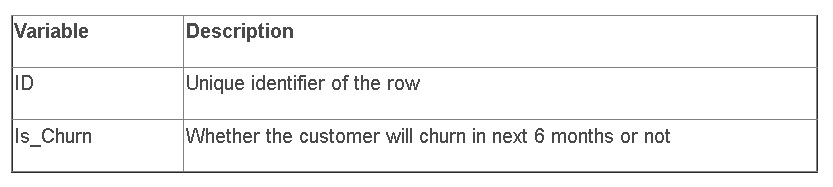

# Exploratory Data Analysis (EDA)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


Using the `info` method we can see that there is 1 column with float data type, 5 columns with integer data type and 5 columns that have object data type. We will try to spearate these columns into numeric and object datatypes for easier analysis.

In [6]:
# getting list of object data type column names
object_datatype = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type column names
number_datatype = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'float64' or df_train.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['ID', 'Gender', 'Income', 'Product_Holdings', 'Credit_Category']

Number Data Type Columns are:
 ['Age', 'Balance', 'Vintage', 'Transaction_Status', 'Credit_Card', 'Is_Churn']


We have successfully bifurcated the object datatype column names and numeric data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process data only on numerical continous columns.

In [7]:
df_train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


Using the `describe` method to check the numerical data details. There are 6 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points showing no major abnormality as such. However we shall take a visual on this later to confirm the same.

In [8]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,6650,6650,6fa4fe79,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,6650.0,NaN,NaN,NaN,41.130226,9.685747,21.0,34.0,40.0,47.0,72.0
Gender,6650,2,Male,3612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,6650,4,10L - 15L,1885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,6650.0,NaN,NaN,NaN,804595.354985,515754.867315,63.0,392264.2125,764938.575,1147123.71,2436615.81
Vintage,6650.0,NaN,NaN,NaN,2.250226,1.458795,0.0,1.0,2.0,3.0,5.0
Transaction_Status,6650.0,NaN,NaN,NaN,0.515789,0.499788,0.0,0.0,1.0,1.0,1.0
Product_Holdings,6650,3,1,3200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Card,6650.0,NaN,NaN,NaN,0.664361,0.472249,0.0,0.0,1.0,1.0,1.0
Credit_Category,6650,3,Poor,3076,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I am using the `describe` method along with it's parameter `all` to include all the columns present in our dataset irrespective of them being numeric or text data. I have also used to the transpose option (T) to make sure that we are able to see the column information properly without having to scroll through multiple data.

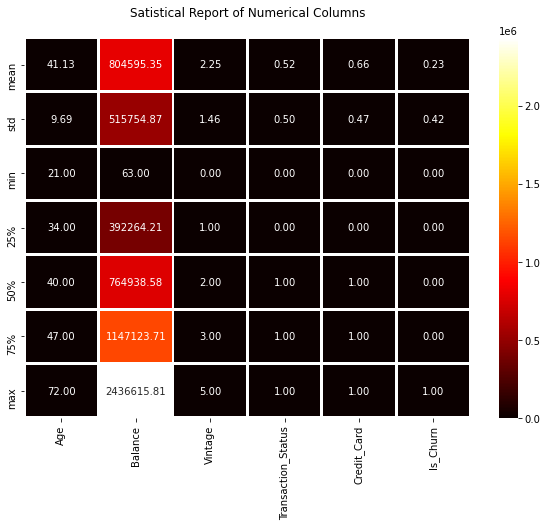

In [9]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df_train.describe()[1:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

With the above visual representation on the statistical data of our training dataset with respect to it's numeric values we can see that column "Balance" has relatively high numeric value when compared with other values and the minimum maximum value for the column has a very dispersed gap.

In [10]:
df_train.isna().sum() # checking for missing values

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

Great it looks like we do not have any null values in our training dataset therefore will not have to worry about handling missing values

<AxesSubplot:>

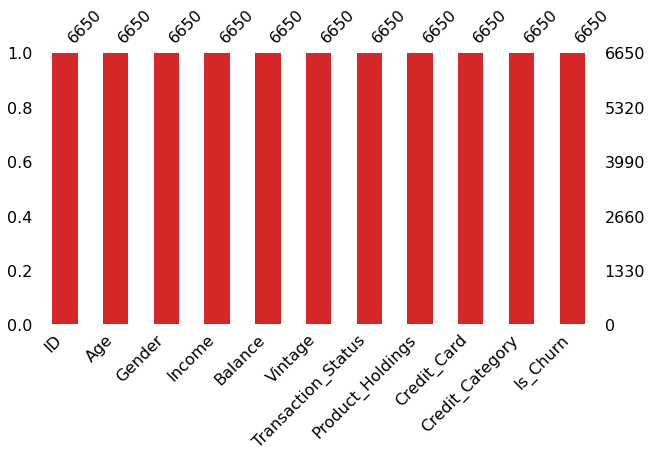

In [11]:
missingno.bar(df_train, figsize = (10,5), color="tab:red")

After taking a visual for the missing values information using `missingno` we can confirm that all the records are filled with data in our training dataset

# Visualization

In [12]:
pandas_profiling.ProfileReport(df_train)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

`pandas-profiling` is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. It generates interactive reports in web format that can be presented to any person, even if they don’t know programming. It also offers report generation for the dataset with lots of features and customizations for the report generated. In short, what `pandas-profiling` does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

In [13]:
df_train.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Gender,2
Transaction_Status,2
Credit_Card,2
Is_Churn,2
Product_Holdings,3
Credit_Category,3
Income,4
Vintage,6
Age,52
Balance,6643


Checking the number of unique record count for every column in our training dataset

In [14]:
low_unique_no_col = ["Gender", "Transaction_Status", "Credit_Card", "Is_Churn", "Product_Holdings", 
                    "Credit_Category", "Income", "Vintage"]
for col in low_unique_no_col:
    print(col)
    print(df_train[col].value_counts())
    print("="*120)

Gender
Male      3612
Female    3038
Name: Gender, dtype: int64
Transaction_Status
1    3430
0    3220
Name: Transaction_Status, dtype: int64
Credit_Card
1    4418
0    2232
Name: Credit_Card, dtype: int64
Is_Churn
0    5113
1    1537
Name: Is_Churn, dtype: int64
Product_Holdings
1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64
Credit_Category
Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64
Income
10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64
Vintage
3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64


Taking a closer look at the categories and values for our low value count unique records for the columns present in our dataset

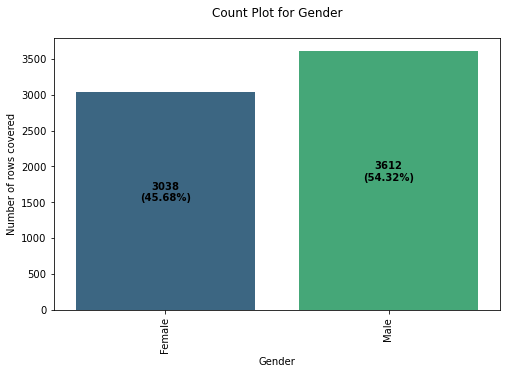

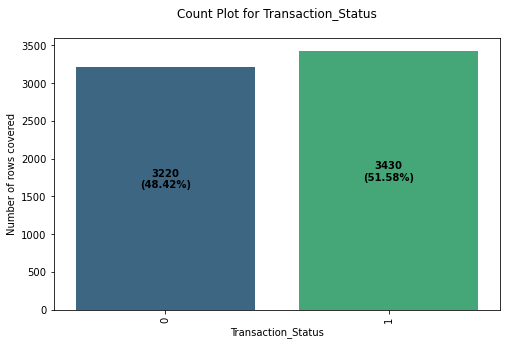

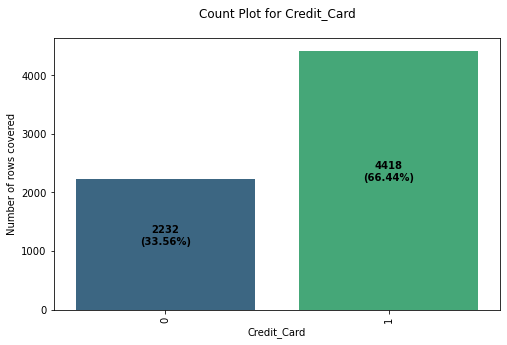

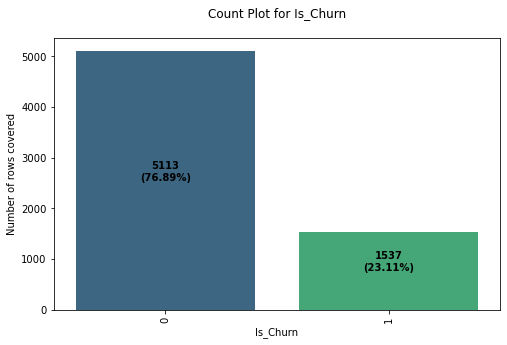

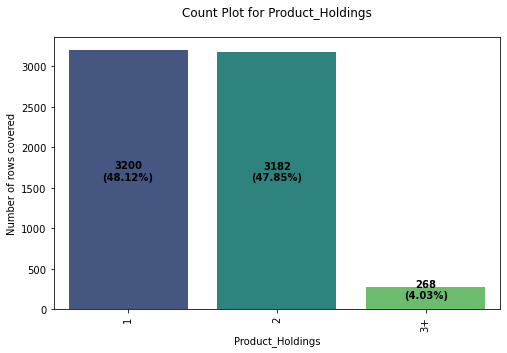

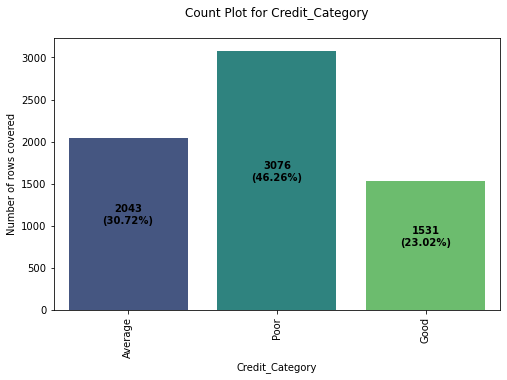

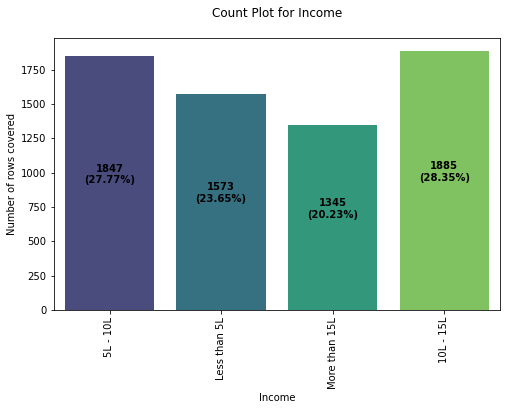

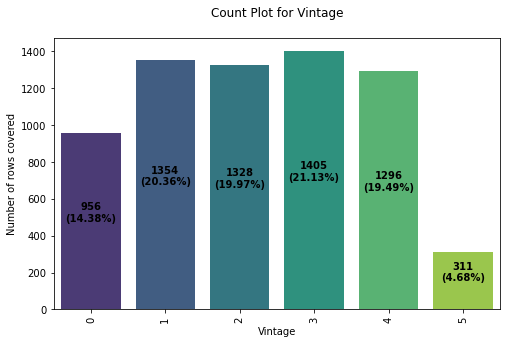

In [15]:
for col in df_train[low_unique_no_col]:
    plt.figure(figsize=(8,5))
    col_name = col
    values = df_train[col_name].value_counts()
    index = 0
    ax = sns.countplot(df_train[col_name], palette="viridis")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(df_train[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()

### Observation:
- In the "Gender" feature we have more number of males as compared to their female counterparts
- With respect to "Transaction Status" we see that customer who did a transaction in past 3 months is only slightly higher than the customers who did not and can be potential customers looking to leave
- We can see that in "Credit Card" column many of our customer already have a credit card but still 33.56% of them do not hold an active credit card yet
- Looking at our target label column "Is Churn" we see customers mostly under the not leaving section over we still have around 1537 customers who may leave in the next 6 months time span and will need to be retained
- After taking a look at the Product Holdings column we can see that customers mostly have 1 or 2 product and very few number of customers go for 3 or more number of product holdings with the bank
- Checking the credit categories we see that 30.72% customer fall under the average type while only 23.02% customers are able to build a good credit history with the bank and a whopping 46.26% customers have a poor credit score
- Ranging in terms of Income feature we see that a larger group of customers range between 5-15 lakh income while we still see that there are customers on the extreme zone with few under 5 lakh income while few over 15 lakh income bracket
- Finally we detect the Vintage column categories that shows how long a customer has been associated with the bank and customers with 5 years of tenurity are least when compared to other year categories

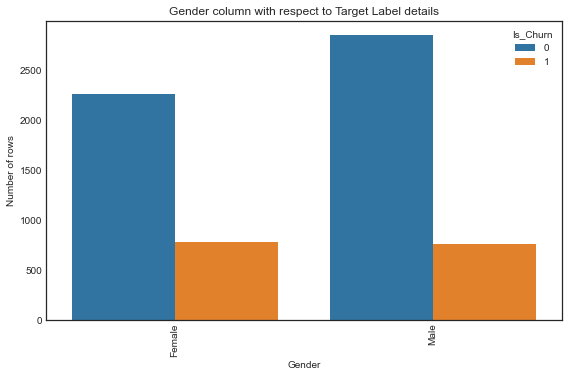

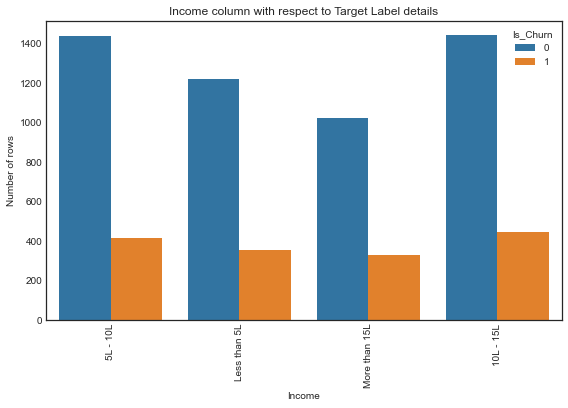

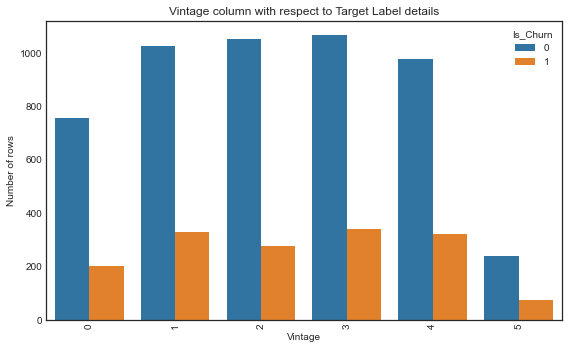

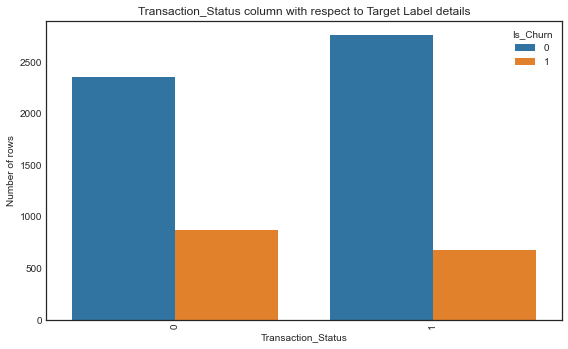

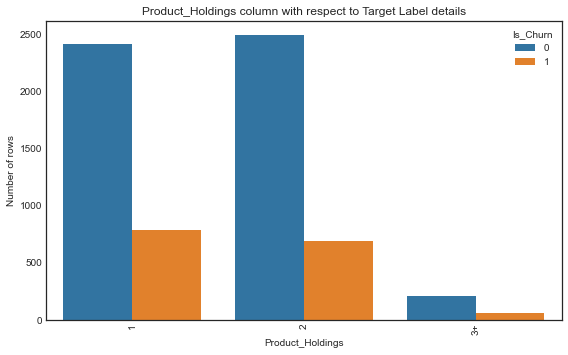

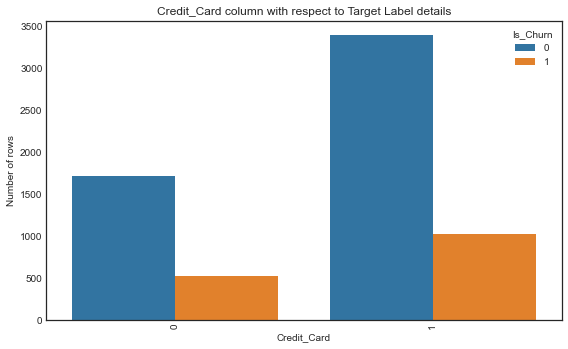

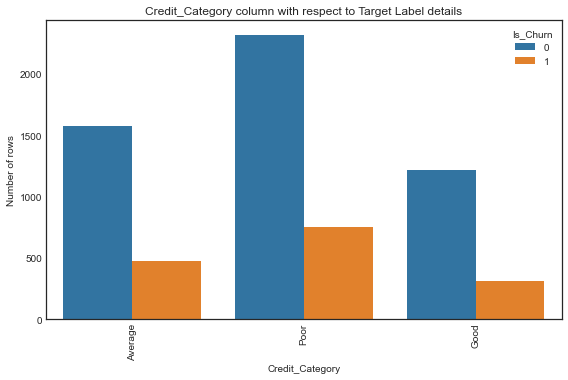

In [16]:
for col in df_train:
    if col == "Is_Churn":
        pass
    elif col == "ID":
        pass
    elif col == "Age":
        pass
    elif col == "Balance":
        pass
    else:
        plt.style.use('seaborn-white')
        plt.figure(figsize=(8,5))
        sns.countplot(x=col, data=df_train, hue="Is_Churn")
        plt.title("{} column with respect to Target Label details".format(col))
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.ylabel("Number of rows")
        plt.show()

### Observation:
- We can see that gender wise female customers are slightly on a higher number than male customers to be leaving the bank in next 6 months
- In terms of income bracket people with more than 15 lakh are less likely to leave in next 6 months period while customer ranging between 5-15 lakh have a higher number on the churn value
- Similar to Income feature we see a pattern where customers who have stayed with the bank for 5 years are less likely to leave in next 6 months period
- When it comes to transaction status customers who have not made any transactions in last 3 months have a slightly higher number on churn rate
- Inspecting the Product Holdings part the customers with 1 or 2 products are more likely to leave as compared to customers with more than 3 product holdings even though they are less in number they are more likely to stay with the bank
- Checking the Credit Card details customers who do not have an active credit card are less likely to leave when compared to customers with a credit card possibly due to poor credit score
- Finally taking a look at the Credit Category we see that customers with poor credit score are most likely to leave the bank in next 6 months period

# Encoding the categorical object datatype columns

In [17]:
object_datatype

['ID', 'Gender', 'Income', 'Product_Holdings', 'Credit_Category']

In [18]:
# Label Encoder

le = LabelEncoder()
df_train["Gender"] = le.fit_transform(df_train["Gender"])
df_train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,0,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,0,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,0,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,0,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,0,More than 15L,893146.23,1,1,1,1,Good,1


In [19]:
# Ordinal Encoder

oe = OrdinalEncoder()
oe_col = ["Income", "Product_Holdings", "Credit_Category"]

def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df_train, oe_col)
df.drop("ID", axis=1 , inplace=True)
df.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1.0,563266.44,4,0,0.0,0,0.0,1
1,53,0,2.0,875572.11,2,1,0.0,1,2.0,0
2,35,0,3.0,701607.06,2,1,1.0,0,2.0,0
3,43,0,3.0,1393922.16,0,1,1.0,1,2.0,1
4,39,0,3.0,893146.23,1,1,0.0,1,1.0,1


In [20]:
print(f"Shape of our data frame post encoding is", df.shape)

Shape of our data frame post encoding is (6650, 10)


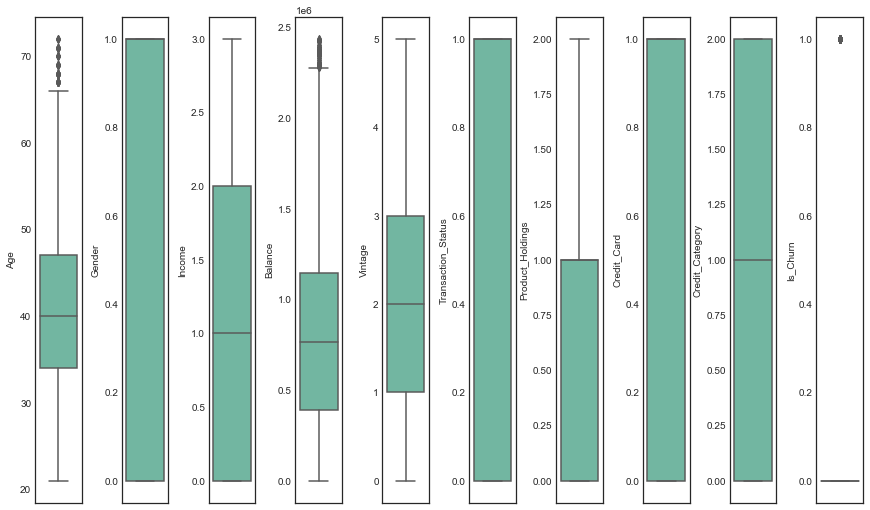

In [21]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=10, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Feature Columns "Age" and "Balance" are the 2 continous data columns in our entire dataset and show visible outliers which we will try to remove if required depending on our model accuracy score since the first step is to retain as much data as possible without losing them unless required.

In [22]:
df.skew()

Age                   0.555171
Gender               -0.173317
Income                0.179945
Balance               0.464460
Vintage               0.021421
Transaction_Status   -0.063204
Product_Holdings      0.414216
Credit_Card          -0.696287
Credit_Category      -0.304310
Is_Churn              1.275912
dtype: float64

With the `skew` method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value. However most of those are categorical columns and we do not have to worry about outliers or skewness in catagorical data therefore we will ignore it. Having said that we will treat the skewness that is present in our continous data columns.

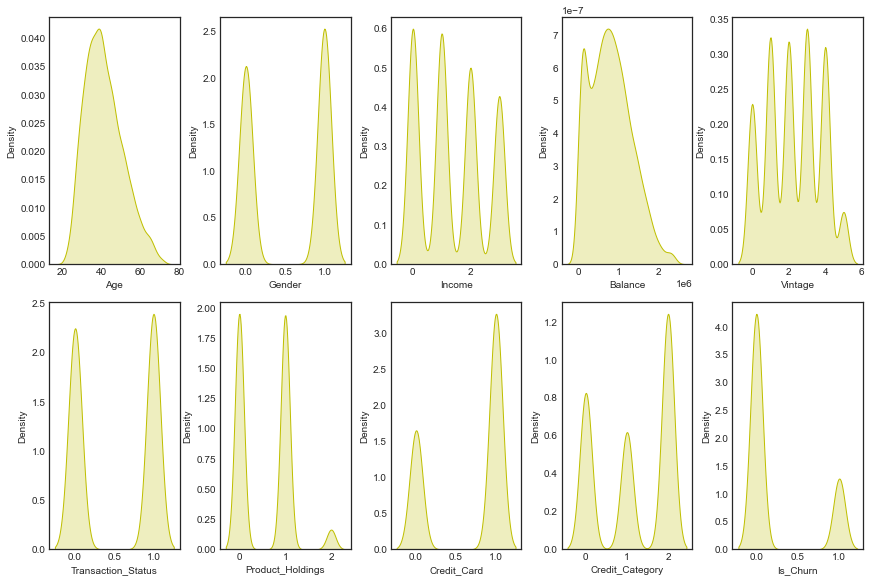

In [23]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(12,8))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Ignoring all the categorical columns I can see that "Age" and "Balance" which are our continous data columns have almost a normal distribution retaining their bell shape curve.

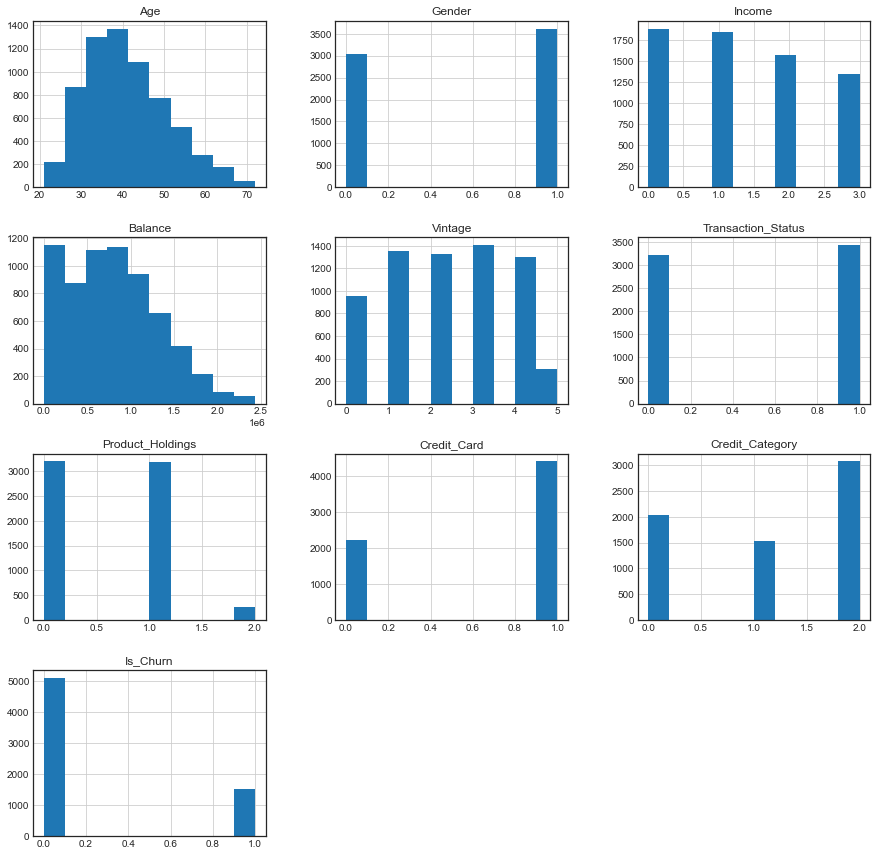

In [24]:
df.hist(figsize=(15,15))
plt.show()

Taking a visual on our dataset columns using the historam bins and observing the continous data column details.

# Correlation using a Heatmap
- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

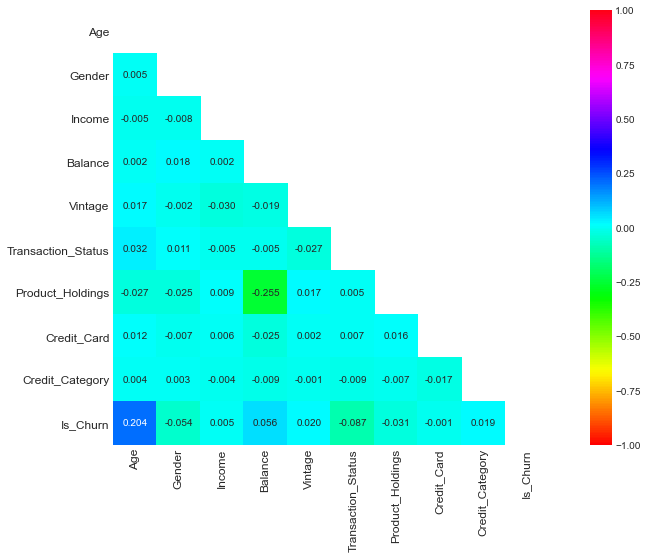

In [25]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="hsv", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns.

# Correlation Bar Plot comparing features with our label

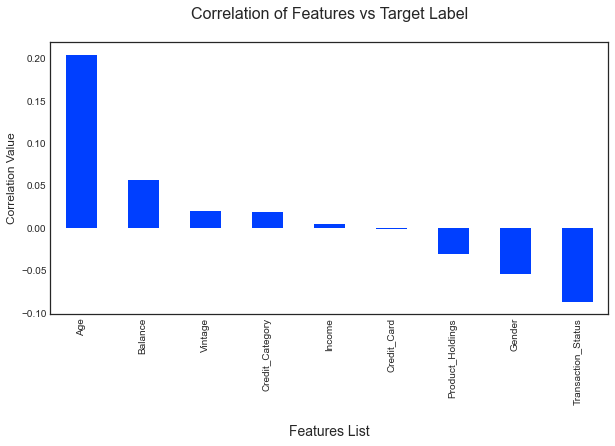

In [26]:
plt.style.use('seaborn-bright')

df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Is_Churn'].sort_values(ascending=False).drop('Is_Churn').plot.bar()
plt.title("Correlation of Features vs Target Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that columns Age, Balance, Vintage, Credit Category, Income and Credit Card are positively correlated with our target label churn while all the remaining features are negatively correlated with our label column.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [27]:
X = df.drop('Is_Churn', axis=1)
Y = df['Is_Churn']

# Resolving the class imbalance issue in our label column

In [28]:
Y.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates a huge class imbalance that we will have to fix by using the oversampling method.

In [29]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

`SMOTE` is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [30]:
Y.value_counts()

0    5113
1    5113
Name: Is_Churn, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [31]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,-0.667999,-0.884044,-0.353129,-0.500646,1.362466,-0.817262,-1.008114,-1.185560,-1.440450
1,1.158403,-0.884044,0.617046,0.101434,-0.093090,1.223598,-1.008114,0.843484,1.020424
2,-0.775434,-0.884044,1.587220,-0.233945,-0.093090,1.223598,0.847114,-1.185560,1.020424
3,0.084049,-0.884044,1.587220,1.100739,-1.548646,1.223598,0.847114,0.843484,1.020424
4,-0.345693,-0.884044,1.587220,0.135315,-0.820868,1.223598,-1.008114,0.843484,-0.210013


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building our Classification Models

In [32]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 71.64646069612827 on Random State 604


Great so with the help of random state selection process we have found our lucky number to be "604" amongst 1-1000 range.

# Feature importance bar graph

,Importance
Features,
Balance,0.223
Age,0.201
Income,0.125
Credit_Category,0.119
Product_Holdings,0.109
Vintage,0.081
Transaction_Status,0.068
Gender,0.048
Credit_Card,0.027


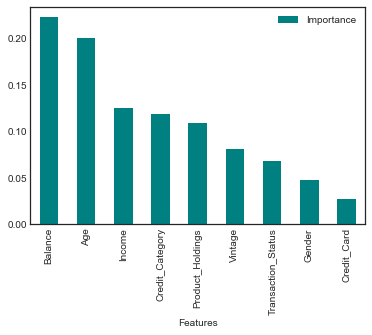

In [33]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

Here with the help of `RandomForestClassifier` we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label. We can see that our continous data columns "Balance" and "Age" have the highest importance while determining the churn prediction.

# Machine Learning Model for Classification with Evaluation Metrics

In [34]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=604)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # F1 Score
    f_one_score = (f1_score(Y_test, pred, average='macro'))*100
    print("F1 Score:", f_one_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a function that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score and f1 score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [35]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70      1337
           1       0.67      0.72      0.70      1220

    accuracy                           0.70      2557
   macro avg       0.70      0.70      0.70      2557
weighted avg       0.70      0.70      0.70      2557

Accuracy Score: 69.73015252248729
F1 Score: 69.72881449259403
Cross Validation Score: 69.25592545057803

Accuracy Score - Cross Validation Score is 0.4742270719092545


In [36]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1337
           1       0.71      0.71      0.71      1220

    accuracy                           0.73      2557
   macro avg       0.73      0.73      0.73      2557
weighted avg       0.73      0.73      0.73      2557

Accuracy Score: 72.62416894798592
F1 Score: 72.57060017040892
Cross Validation Score: 72.50296003651947

Accuracy Score - Cross Validation Score is 0.12120891146645363


In [37]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      1337
           1       0.75      0.76      0.76      1220

    accuracy                           0.77      2557
   macro avg       0.76      0.77      0.76      2557
weighted avg       0.77      0.77      0.77      2557

Accuracy Score: 76.5350019554165
F1 Score: 76.49977452527767
Cross Validation Score: 74.47873482040215

Accuracy Score - Cross Validation Score is 2.0562671350143518


In [38]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83      1337
           1       0.83      0.75      0.79      1220

    accuracy                           0.81      2557
   macro avg       0.81      0.81      0.81      2557
weighted avg       0.81      0.81      0.81      2557

Accuracy Score: 80.99335158388736
F1 Score: 80.828653765458
Cross Validation Score: 80.45424192233878

Accuracy Score - Cross Validation Score is 0.5391096615485793


In [39]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.69      1337
           1       0.66      0.73      0.69      1220

    accuracy                           0.69      2557
   macro avg       0.69      0.69      0.69      2557
weighted avg       0.69      0.69      0.69      2557

Accuracy Score: 68.83066093077825
F1 Score: 68.82972652561855
Cross Validation Score: 70.07749870341559

Accuracy Score - Cross Validation Score is -1.2468377726373348


In [40]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1337
           1       0.79      0.75      0.77      1220

    accuracy                           0.78      2557
   macro avg       0.78      0.78      0.78      2557
weighted avg       0.78      0.78      0.78      2557

Accuracy Score: 78.21666014861165
F1 Score: 78.11532100701709
Cross Validation Score: 78.48834747028612

Accuracy Score - Cross Validation Score is -0.2716873216744631


In [41]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      1337
           1       0.88      0.74      0.80      1220

    accuracy                           0.83      2557
   macro avg       0.84      0.83      0.83      2557
weighted avg       0.84      0.83      0.83      2557

Accuracy Score: 82.90965975752836
F1 Score: 82.64459780569469
Cross Validation Score: 81.46175374694973

Accuracy Score - Cross Validation Score is 1.4479060105786346


In [42]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86      1337
           1       0.91      0.73      0.81      1220

    accuracy                           0.84      2557
   macro avg       0.85      0.83      0.83      2557
weighted avg       0.85      0.84      0.83      2557

Accuracy Score: 83.65271802894017
F1 Score: 83.33511079511791
Cross Validation Score: 82.32248504446626

Accuracy Score - Cross Validation Score is 1.3302329844739091


We can see that we are able to get a better accuracy score and f1 score for LGBM Classifier as compared to all the other Classification Models. Therefore we will try to hyper tune it further and check if we can enhance the model confidence further.

# Hyper parameter tuning on the best Classification ML Model

In [45]:
# Choosing LGBM Classifier

fmod_param = {'learning_rate' : [0.1, 0.01, 0.001],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [10, 42, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

GSCV = GridSearchCV(lgb.LGBMClassifier(), fmod_param, cv=5)

In [46]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 42, 1000]})

In [47]:
GSCV.best_params_

{'learning_rate': 0.1,
 'max_depth': 15,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [48]:
Final_Model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=15, n_estimators=100, n_jobs=-2, random_state=10)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (f1_score(Y_test, fmod_pred, average='macro'))*100
print("F1 score for the Best Model is:", fmod_acc)

F1 score for the Best Model is: 83.64072650324034


# Predicting the Label values on the test dataset using our Final Model

In [50]:
df = df_test.drop("ID", axis=1)
df

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,48,Male,More than 15L,1104540.03,2,1,3+,0,Good
...,...,...,...,...,...,...,...,...,...
2846,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor
2847,48,Female,More than 15L,1448280.27,0,1,2,1,Average
2848,59,Male,More than 15L,1100555.64,3,0,1,1,Poor
2849,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor


In [51]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [52]:
# Label Encoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Ordinal Encoder

oe = OrdinalEncoder()
oe_col = ["Income", "Product_Holdings", "Credit_Category"]

def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

X=ordinal_encode(df, oe_col)
X.head(10)

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,0,3.0,1008636.39,2,1,1.0,1,0.0
1,36,1,1.0,341460.72,2,0,1.0,1,0.0
2,25,0,0.0,439460.10,0,0,1.0,1,1.0
3,41,1,2.0,28581.93,0,1,1.0,1,2.0
4,48,1,3.0,1104540.03,2,1,2.0,0,1.0
5,52,0,3.0,788950.44,3,0,0.0,1,1.0
6,45,1,1.0,1531320.12,3,0,0.0,1,2.0
7,49,1,1.0,735035.40,2,1,1.0,1,1.0
8,41,0,3.0,1419096.96,1,0,1.0,1,2.0
9,38,0,1.0,929025.18,1,1,0.0,1,1.0


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2851 non-null   int64  
 1   Gender              2851 non-null   int32  
 2   Income              2851 non-null   float64
 3   Balance             2851 non-null   float64
 4   Vintage             2851 non-null   int64  
 5   Transaction_Status  2851 non-null   int64  
 6   Product_Holdings    2851 non-null   float64
 7   Credit_Card         2851 non-null   int64  
 8   Credit_Category     2851 non-null   float64
dtypes: float64(4), int32(1), int64(4)
memory usage: 189.4 KB


In [54]:
# Feature Scaling

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,0.909802,-1.087659,1.521174,0.378469,-0.148337,0.986413,0.708217,0.703575,-1.337061
1,-0.546246,0.919406,-0.297982,-0.892080,-0.148337,-1.013774,0.708217,0.703575,-1.337061
2,-1.690283,-1.087659,-1.207559,-0.705453,-1.490908,-1.013774,0.708217,0.703575,-0.165952
3,-0.026229,0.919406,0.611596,-1.487916,-1.490908,0.986413,0.708217,0.703575,1.005157
4,0.701795,0.919406,1.521174,0.561105,-0.148337,0.986413,2.402114,-1.421312,-0.165952


In [55]:
Predicted_Churn = Final_Model.predict(X)

# Checking the predicted churn details and storing in dataframe format
predicted_output = pd.DataFrame()
predicted_output['ID'] = df_test["ID"]
predicted_output['Is_Churn'] = Predicted_Churn
predicted_output

,ID,Is_Churn
0,55480787,1
1,9aededf2,1
2,a5034a09,1
3,b3256702,1
4,dc28adb5,1
...,...,...
2846,19e40adf,1
2847,52d5bc8d,1
2848,f708121b,1
2849,f008715d,1


In [59]:
predicted_output.to_csv("sample_submission1.csv", index=False)

Saved the submission format predicted label output disabling the index details into CSV format file.